In [2]:
# load all the wsb_* files

import pandas as pd
import numpy as np

# load all the wsb_* files
stocks = ["GME", "AMC", "BB", "TSLA", "PLTR", "MSFT", "BBBY", "SPY", "AAPL"]

dfs = {}
for stock in stocks:
    df = pd.read_csv(f"wsb_{stock}.csv")
    dfs[stock] = df

dfs["GME"].head()

,Unnamed: 0,title,score,id,url,comms_num,created,body,timestamp,original_body
0,2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47.0,1.611862e+09,ceo nasdaq push halt trading investor chance r...,2021-01-28 21:30:35,The CEO of NASDAQ pushed to halt trading “to g...
1,6,SHORT STOCK DOESN'T HAVE AN EXPIRATION DATE,317,l6uf6d,https://www.reddit.com/r/wallstreetbets/commen...,53.0,1.611862e+09,hedgefund whale spread disinfo say friday make...,2021-01-28 21:26:27,Hedgefund whales are spreading disinfo saying ...
2,7,THIS IS THE MOMENT,405,l6ub9l,https://www.reddit.com/r/wallstreetbets/commen...,178.0,1.611862e+09,life not fair mother tell complain arbitrary t...,2021-01-28 21:19:31,Life isn't fair. My mother always told me that...
3,10,"We need to keep this movement going, we all ca...",222,l6uao1,https://www.reddit.com/r/wallstreetbets/commen...,70.0,1.611862e+09,believe right rare opportunity help good compa...,2021-01-28 21:18:25,I believe right now is one of those rare oppo...
4,12,"Once you're done with GME - $AG and $SLV, the ...",0,l6u9wu,https://www.reddit.com/r/wallstreetbets/commen...,16.0,1.611861e+09,guy champs gme think bunch crazy retard reach ...,2021-01-28 21:17:10,You guys are champs. GME... who would have tho...


In [3]:
import re


def count_capital_letters(string):
    capital_letters = re.findall(r'[A-Z]', string)
    return len(capital_letters)
  

def count_post_length(string):
    return len(string)

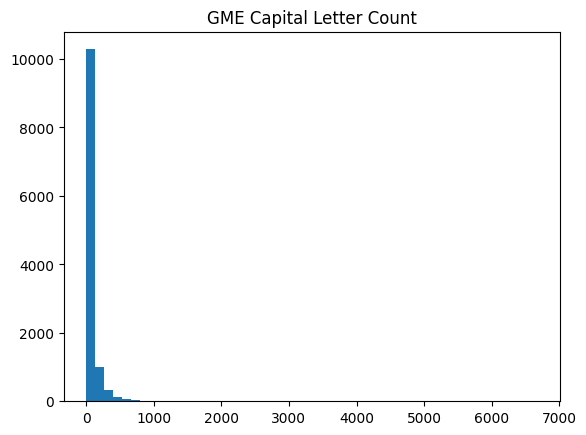

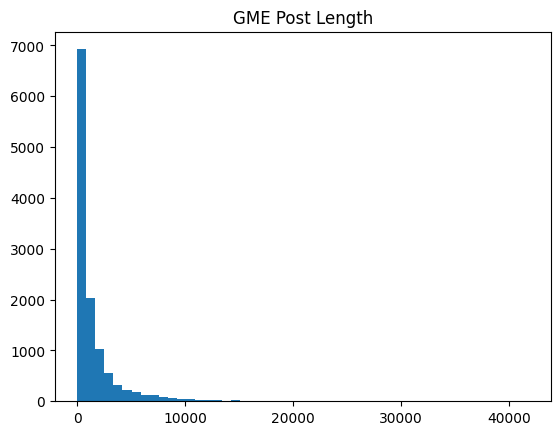

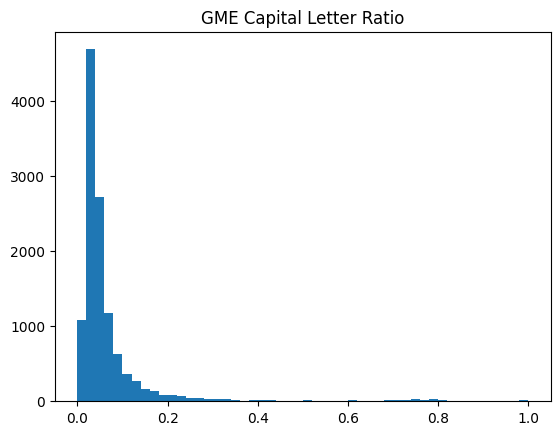

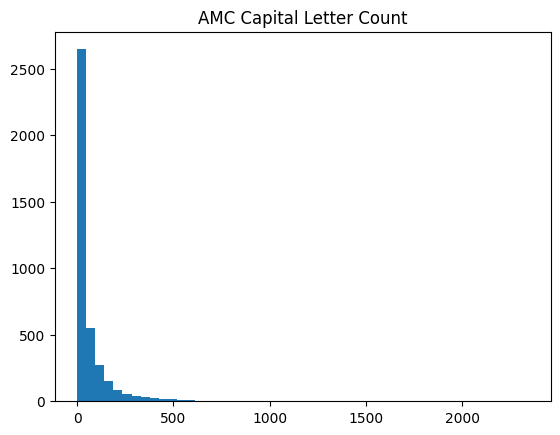

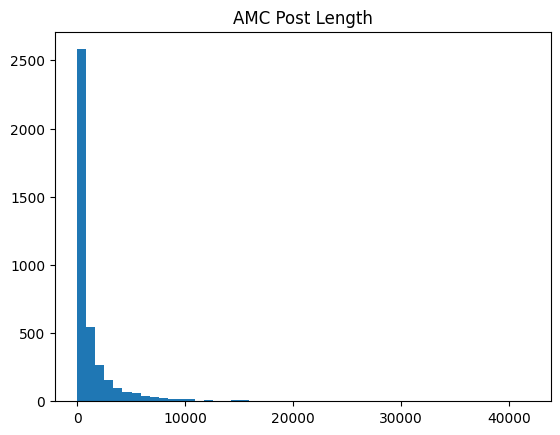

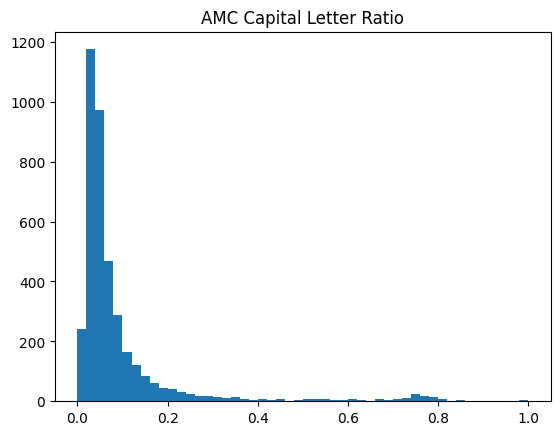

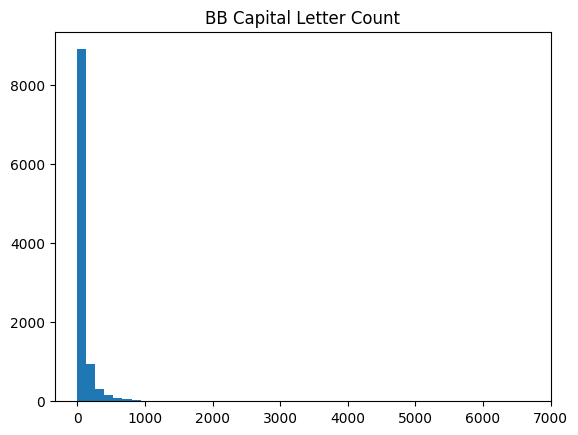

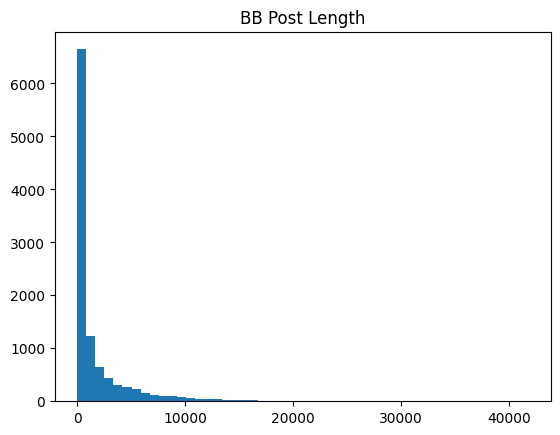

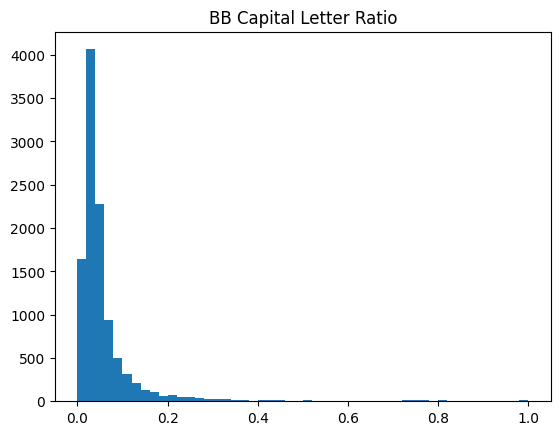

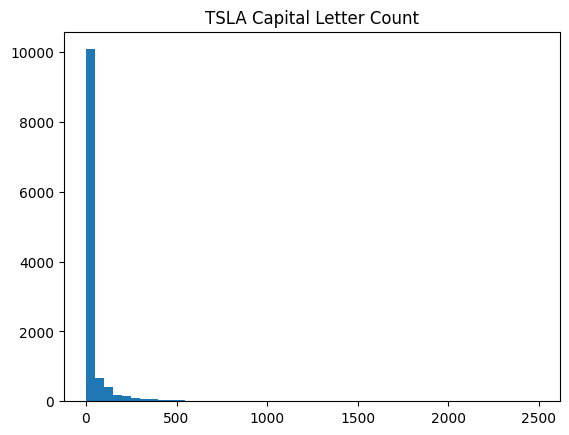

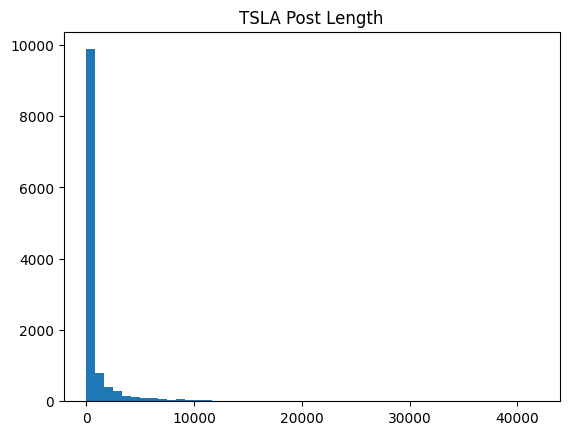

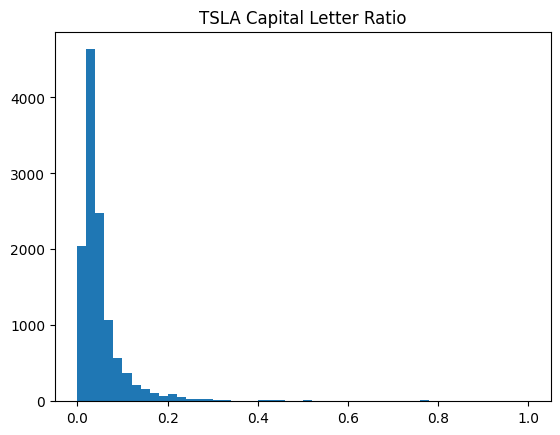

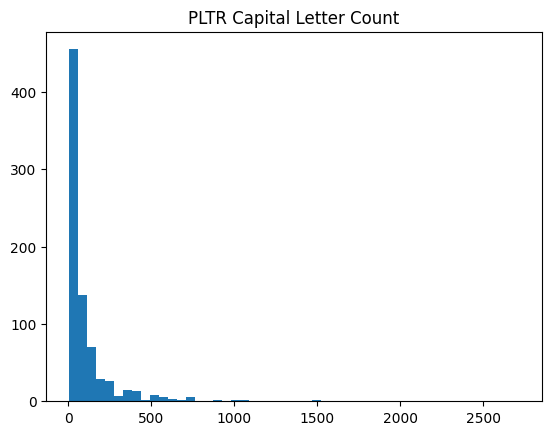

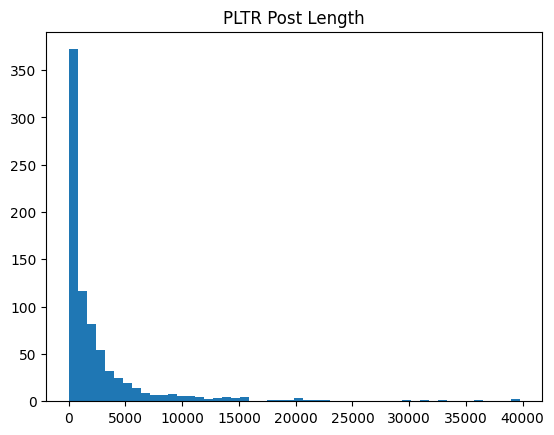

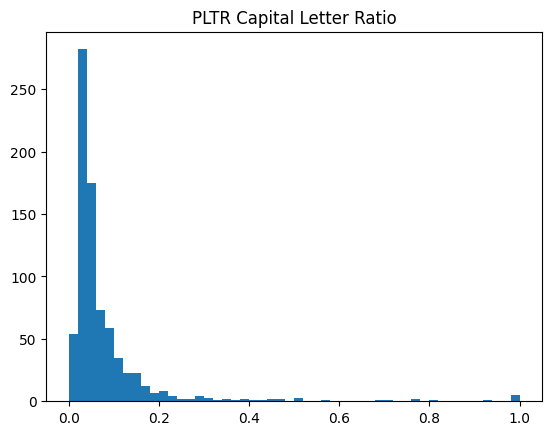

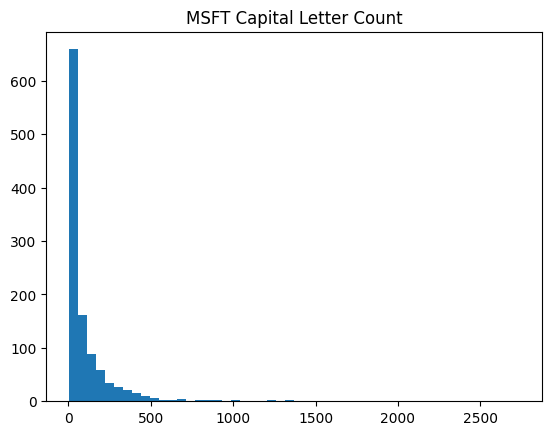

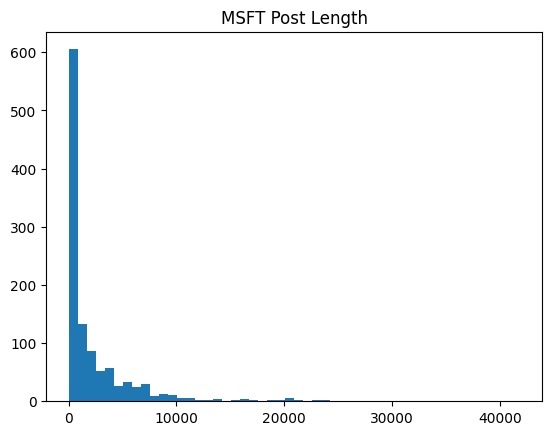

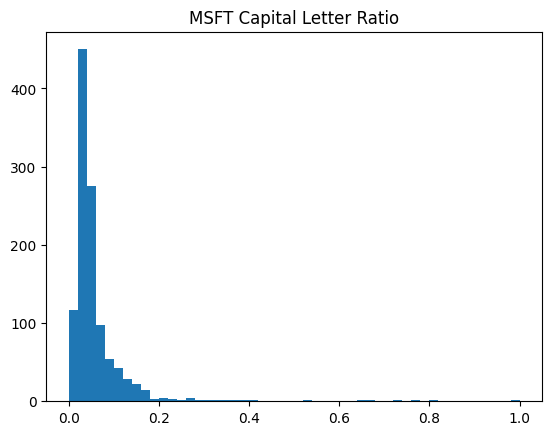

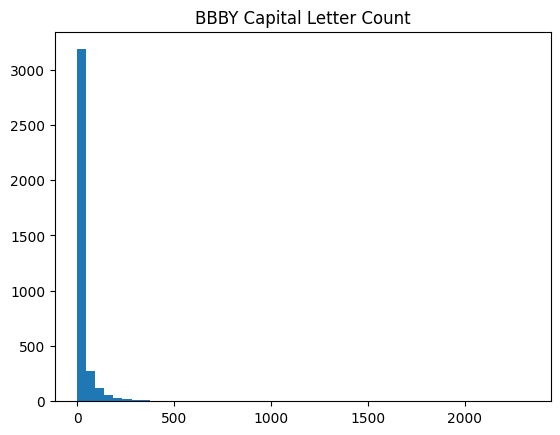

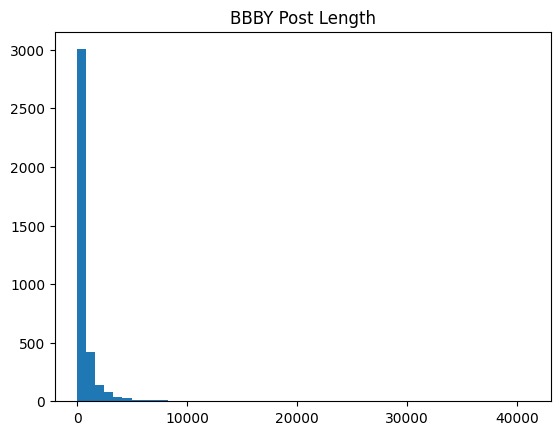

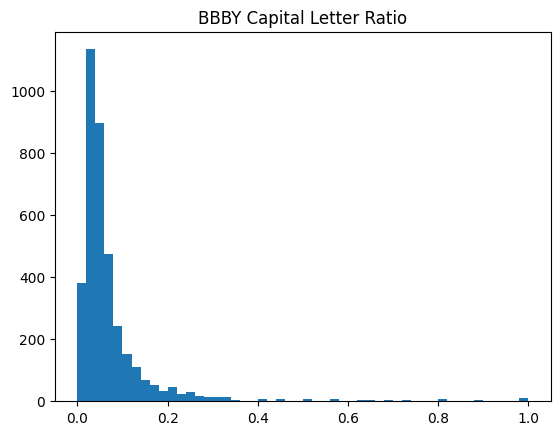

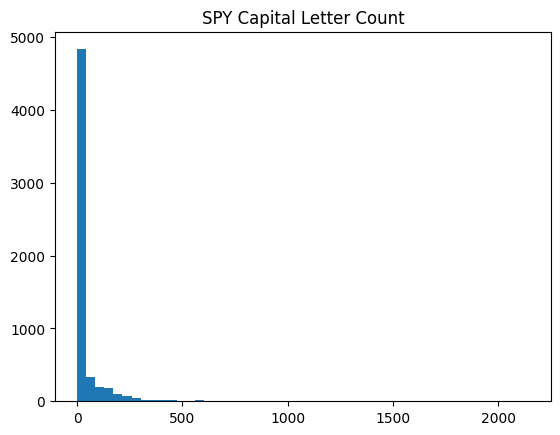

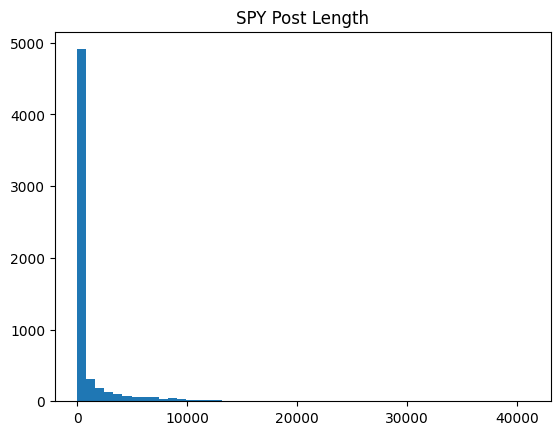

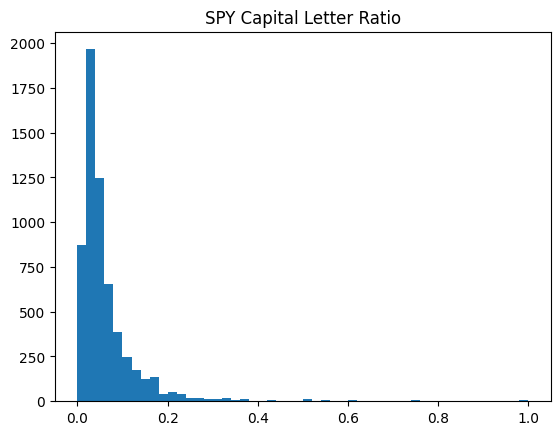

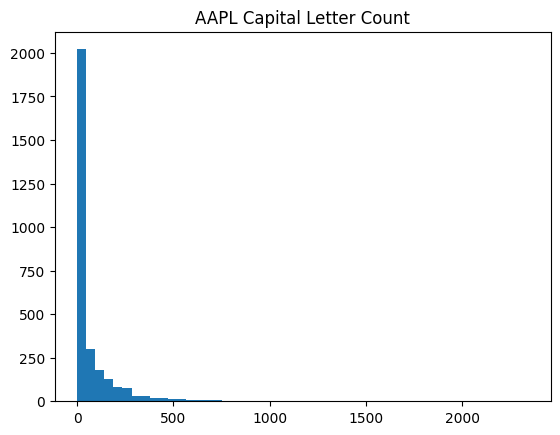

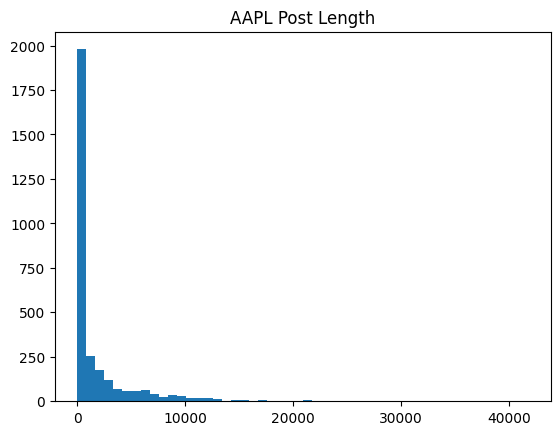

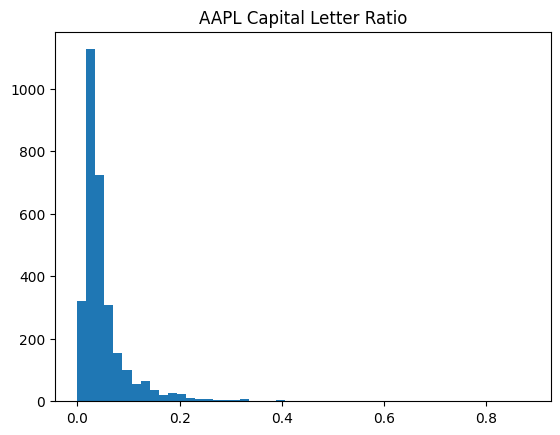

In [8]:
import matplotlib.pyplot as plt


for stock in stocks:
    df = dfs[stock]

    df["capital_letter_count"] = df["original_body"].apply(lambda x: count_capital_letters(x))
    df["post_length"] = df["original_body"].apply(lambda x: count_post_length(x))
    df["capital_letter_ratio"] = df["capital_letter_count"] / df["post_length"]

    # plot histogram of number of capital letters
    plt.hist(df[df["capital_letter_count"] > 0]["capital_letter_count"], bins=50)
    plt.title(f"{stock} Capital Letter Count")
    plt.show()

    # plot histogram of post length
    plt.hist(df["post_length"], bins=50)
    plt.title(f"{stock} Post Length")
    plt.show()
    
    # plot histogram of capital letter ratio
    plt.hist(df["capital_letter_ratio"], bins=50)
    plt.title(f"{stock} Capital Letter Ratio")
    plt.show()

In [9]:
# print sample of posts with emojis
pd.set_option('display.max_colwidth', 50)

df = dfs["AAPL"]
df[df["capital_letter_ratio"] > 0.5]["original_body"].sample(10)


2705                     #PINEAPPLE BEST TOPPING ON PIZZA
836     Sorry again!! \n\nAMAZON\nGOOGLE\nAAPL\n\nCHOO...
803                                           MA, V, AAPL
1880    NICE T.R.A.D.E IN AAPL SHORT POSITION STRIKE 1...
1941    FOR THE LOVE OF AAPL PUTS. GIVE ME STRENGTH TO...
13      ARLO ( NOW NOT A HARDWARE PLAY BUT CLOUD PLAY)...
1128    >GERMAN CARTEL OFFICE SAYS HAS INITIATED PROCE...
1330                           PUTS ON AAPL EARNINGS APES
1500    APPLE LAYS OFF RECRUITERS AS PART OF ITS SLOWD...
771                                     APPLE STRONG LMAO
Name: original_body, dtype: object